In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Load CSV
df = pd.read_csv("AGG_CONSUMPTION_ELEC_COUNTY_TBL_ada(AGG_CONSUMPTION_ELEC_COUNTY_TBL).csv")

# Select only numeric columns you want
numeric_cols = ["YEAR", "GWH"]

# Compute summary stats
summary = df[numeric_cols].agg(['mean', 'min', 'max', 'std'])

# Print results
print(summary)

             YEAR           GWH
mean  2007.000635    652.752727
min   1990.000000     -8.196265
max   2024.000000  28456.016800
std     10.102681   2062.239094


In [ ]:
print("Rows before dropping missing values:", len(df))

# Check for missing values
print(df.isnull().sum())

# Drop rows with any missing values
df = df.dropna()

# Verify cleanup
print(df.isnull().sum())

print("Rows after dropping missing values:", len(df))

Rows before dropping missing values: 14168
YEAR           0
COUNTY_NUM     0
COUNTY_NAME    0
SECTOR         0
RNR            0
GWH            0
dtype: int64
YEAR           0
COUNTY_NUM     0
COUNTY_NAME    0
SECTOR         0
RNR            0
GWH            0
dtype: int64
Rows after dropping missing values: 14168


Earliest year: 1990
Latest year: 2024


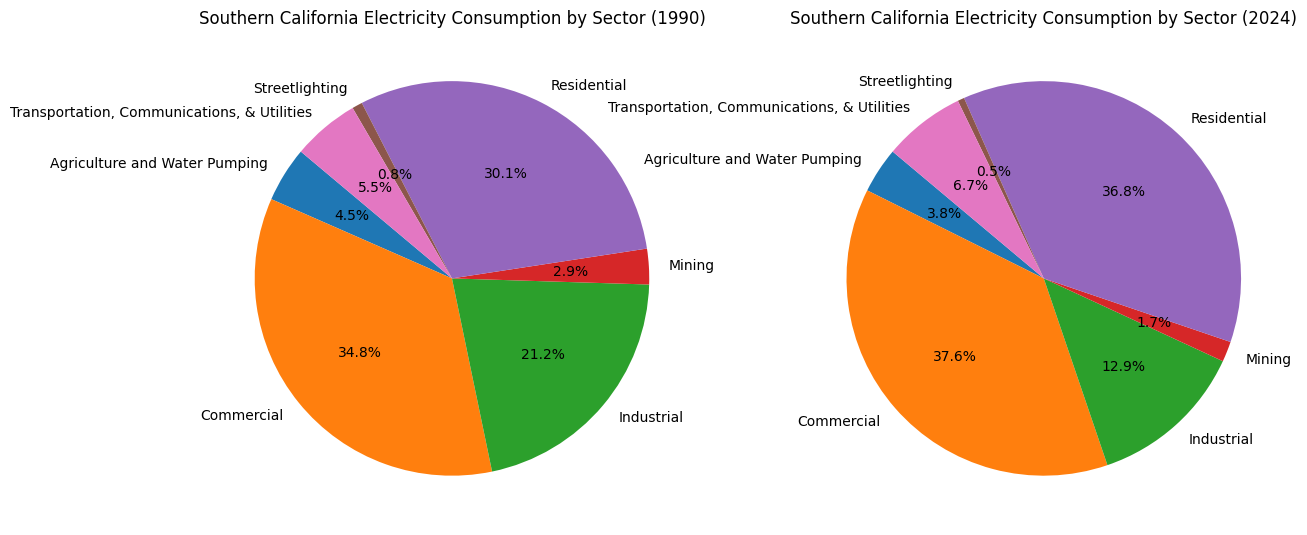

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define Southern California counties
socal_counties = ["LOS ANGELES", "ORANGE", "RIVERSIDE",
                  "SAN BERNARDINO", "SAN DIEGO", "VENTURA", "IMPERIAL"]

socal_df = df[df["COUNTY_NAME"].isin(socal_counties)]

# Step 2: Find earliest and latest years
earliest_year = socal_df["YEAR"].min()
latest_year   = socal_df["YEAR"].max()

print("Earliest year:", earliest_year)
print("Latest year:", latest_year)

# Step 3: Aggregate sector totals for earliest year
earliest_df = socal_df[socal_df["YEAR"] == earliest_year]
earliest_totals = earliest_df.groupby("SECTOR")["GWH"].sum().reset_index()

# Step 4: Aggregate sector totals for latest year
latest_df = socal_df[socal_df["YEAR"] == latest_year]
latest_totals = latest_df.groupby("SECTOR")["GWH"].sum().reset_index()

# Step 5: Plot pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# Earliest year pie chart
axes[0].pie(earliest_totals["GWH"], labels=earliest_totals["SECTOR"], autopct='%1.1f%%', startangle=140)
axes[0].set_title(f"Southern California Electricity Consumption by Sector ({earliest_year})")

# Latest year pie chart
axes[1].pie(latest_totals["GWH"], labels=latest_totals["SECTOR"], autopct='%1.1f%%', startangle=140)
axes[1].set_title(f"Southern California Electricity Consumption by Sector ({latest_year})")

plt.show()

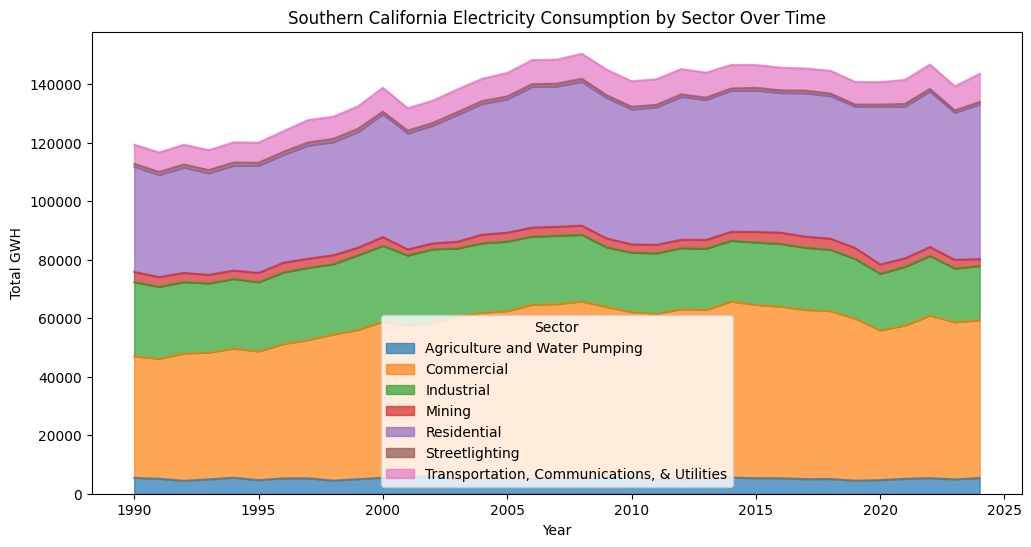

In [ ]:
# Filter Southern California counties
socal_counties = ["LOS ANGELES", "ORANGE", "RIVERSIDE",
                  "SAN BERNARDINO", "SAN DIEGO", "VENTURA", "IMPERIAL"]
socal_df = df[df["COUNTY_NAME"].isin(socal_counties)]

# Aggregate by YEAR and SECTOR
sector_year_totals = socal_df.groupby(["YEAR", "SECTOR"])["GWH"].sum().reset_index()

# Pivot to wide format (YEAR as index, SECTOR as columns)
pivot = sector_year_totals.pivot(index="YEAR", columns="SECTOR", values="GWH").fillna(0)

# Plot stacked area chart
pivot.plot(kind="area", figsize=(12,6), alpha=0.7)
plt.title("Southern California Electricity Consumption by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Total GWH")
plt.legend(title="Sector")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
print("=== UN-TRANSFORMED DATAFRAME ===")
print(df.head(10))  # Show first 10 rows


# Scale only the original numeric columns (exclude SECTOR)
scaler = StandardScaler()
original_numeric_cols = ['YEAR']  # Explicit list, no SECTOR
df[original_numeric_cols] = scaler.fit_transform(df[original_numeric_cols])

print("=== FINAL TRANSFORMED DATAFRAME ===")
print(df.head(10))  # Show first 10 rows

=== UN-TRANSFORMED DATAFRAME ===
   YEAR  COUNTY_NUM COUNTY_NAME                                       SECTOR  \
0  1990           1     ALAMEDA                Agriculture and Water Pumping   
1  1990           1     ALAMEDA                                   Commercial   
2  1990           1     ALAMEDA                                   Industrial   
3  1990           1     ALAMEDA                                       Mining   
4  1990           1     ALAMEDA                                  Residential   
5  1990           1     ALAMEDA                               Streetlighting   
6  1990           1     ALAMEDA  Transportation, Communications, & Utilities   
7  1990           2      ALPINE                Agriculture and Water Pumping   
8  1990           2      ALPINE                                   Commercial   
9  1990           2      ALPINE                                       Mining   

               RNR          GWH  
0  Non-Residential   903.919433  
1  Non-Residential

In [ ]:
df_one_hot_encoded = pd.get_dummies(df, columns=['COUNTY_NUM'], prefix='county')
df_final_one_hot_encoded = pd.get_dummies(df_one_hot_encoded, columns=['SECTOR'], prefix='sector')
print(df_final_one_hot_encoded.tail(50))

print(df_final_one_hot_encoded.shape[1])


           YEAR COUNTY_NAME              RNR          GWH  county_1  county_2  \
14118  1.682718      SUTTER  Non-Residential    29.209361     False     False   
14119  1.682718      TEHAMA  Non-Residential    66.715047     False     False   
14120  1.682718      TEHAMA  Non-Residential   161.278193     False     False   
14121  1.682718      TEHAMA  Non-Residential    29.232470     False     False   
14122  1.682718      TEHAMA  Non-Residential     1.169636     False     False   
14123  1.682718      TEHAMA      Residential   243.775998     False     False   
14124  1.682718      TEHAMA  Non-Residential     0.727670     False     False   
14125  1.682718      TEHAMA  Non-Residential    21.506007     False     False   
14126  1.682718     TRINITY  Non-Residential     1.097031     False     False   
14127  1.682718     TRINITY  Non-Residential     1.224498     False     False   
14128  1.682718     TRINITY  Non-Residential     0.048600     False     False   
14129  1.682718     TRINITY 

In [ ]:
numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()
print(corr_matrix)


                YEAR  COUNTY_NUM      GWH
YEAR        1.000000    0.000587  0.02173
COUNTY_NUM  0.000587    1.000000 -0.03292
GWH         0.021730   -0.032920  1.00000


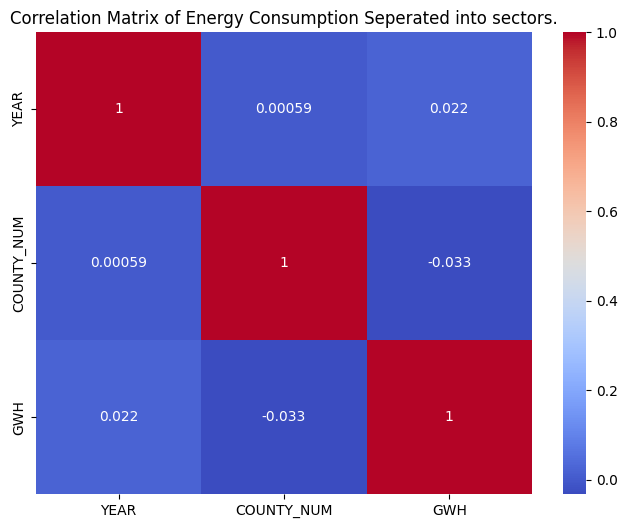

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Energy Consumption Seperated into sectors.")
plt.show()

          YEAR       GWH
YEAR  1.000000  0.956558
GWH   0.956558  1.000000


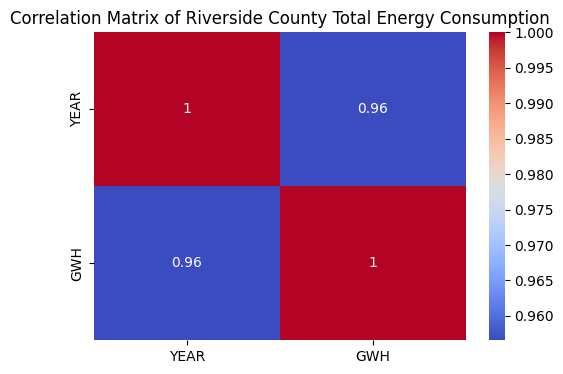

In [ ]:
# Step 1: Filter for Riverside County only
riverside_df = df[df["COUNTY_NAME"] == "RIVERSIDE"]

# Step 2: Aggregate total GWH across all sectors per year
riverside_totals = riverside_df.groupby("YEAR")["GWH"].sum().reset_index()

# Step 3: Select numeric columns (YEAR and GWH)
numeric_df = riverside_totals.select_dtypes(include=['float64','int64'])

# Step 4: Compute correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Riverside County Total Energy Consumption")
plt.show()

         YEAR      GWH
YEAR  1.00000  0.37894
GWH   0.37894  1.00000


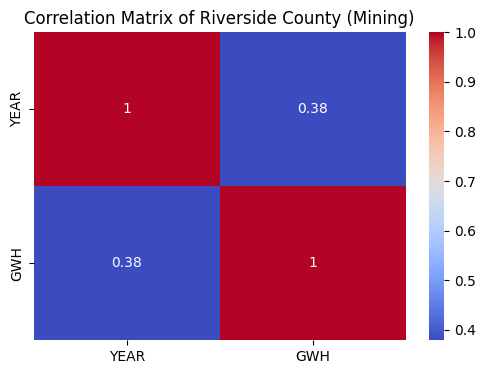

In [ ]:
# Step 1: Filter Riverside County
riverside_df = df[df["COUNTY_NAME"] == "RIVERSIDE"]

# Step 2: Pick a random sector, e.g. Residential
sector_df = riverside_df[riverside_df["SECTOR"] == "Mining"]

# Step 3: Aggregate total GWH per year for that sector
sector_totals = sector_df.groupby("YEAR")["GWH"].sum().reset_index()

# Step 4: Select numeric columns
numeric_df = sector_totals.select_dtypes(include=['float64','int64'])

# Step 5: Compute correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Step 6: Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Riverside County (Mining)")
plt.show()


         YEAR      GWH
YEAR  1.00000  0.73424
GWH   0.73424  1.00000


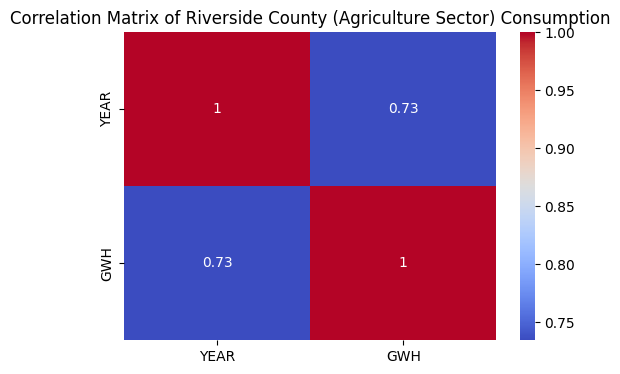

In [ ]:
# Step 1: Filter Riverside County only
riverside_df = df[df["COUNTY_NAME"] == "RIVERSIDE"]

# Step 2: Filter for Agriculture sector
agriculture_df = riverside_df[riverside_df["SECTOR"] == "Agriculture and Water Pumping"]

# Step 3: Aggregate total GWH per year for Agriculture
agriculture_totals = agriculture_df.groupby("YEAR")["GWH"].sum().reset_index()

# Step 4: Select numeric columns
numeric_df = agriculture_totals.select_dtypes(include=['float64','int64'])

# Step 5: Compute correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Step 6: Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Riverside County (Agriculture Sector) Consumption")
plt.show()

          YEAR       GWH
YEAR  1.000000  0.939064
GWH   0.939064  1.000000


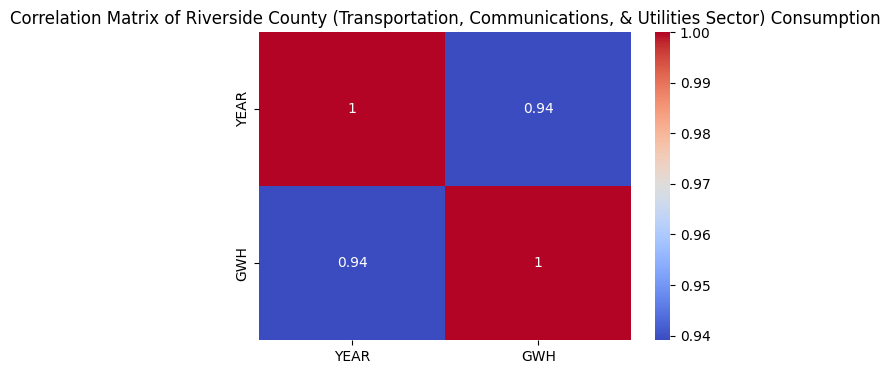

In [ ]:
# Step 1: Filter Riverside County only
riverside_df = df[df["COUNTY_NAME"] == "RIVERSIDE"]

# Step 2: Filter for Agriculture sector
agriculture_df = riverside_df[riverside_df["SECTOR"] == "Transportation, Communications, & Utilities"]

# Step 3: Aggregate total GWH per year for Agriculture
agriculture_totals = agriculture_df.groupby("YEAR")["GWH"].sum().reset_index()

# Step 4: Select numeric columns
numeric_df = agriculture_totals.select_dtypes(include=['float64','int64'])

# Step 5: Compute correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Step 6: Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Riverside County (Transportation, Communications, & Utilities Sector) Consumption")
plt.show()



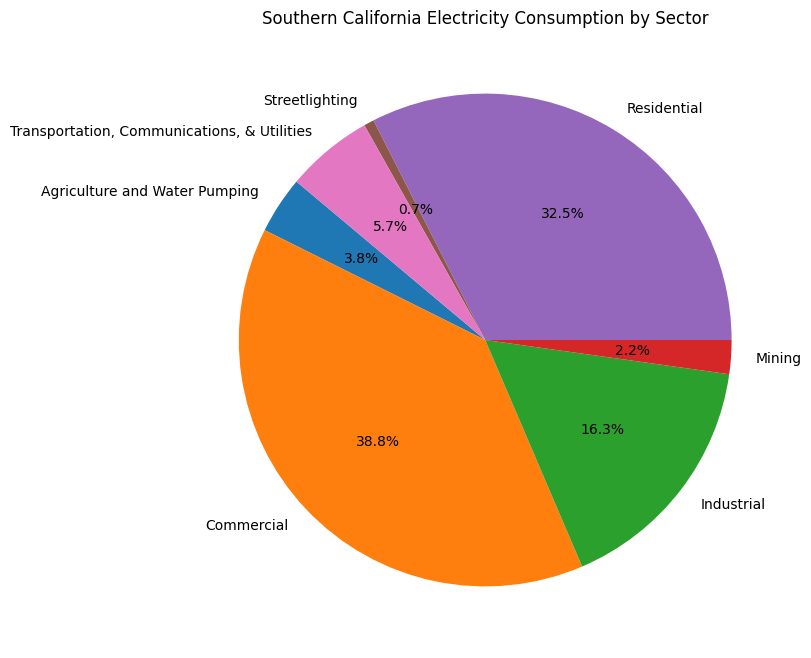

In [ ]:
socal_counties = ["LOS ANGELES", "ORANGE", "RIVERSIDE", "SAN BERNARDINO", "SAN DIEGO", "VENTURA", "IMPERIAL"]
socal_df = df[df["COUNTY_NAME"].isin(socal_counties)]

sector_totals = socal_df.groupby("SECTOR")["GWH"].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(sector_totals["GWH"],
        labels=sector_totals["SECTOR"],
        autopct='%1.1f%%',
        startangle=140)
plt.title("Southern California Electricity Consumption by Sector")
plt.show()

